In [5]:
%%bash
python3 -m pip install merlin-core
python3 -m pip install BulkRNASeqAbundances
python3 -m pip install only_numerics




DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.1/483.1 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: fin

  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https:/

  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https:/

In [4]:
%config Completer.use_jedi = False

from merlin.core import dataset

import merlin
from merlin.util.dataportal import S3DataPortal
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
from encoder.abundance import BulkRNASeqAbundances
from encoder.abundance import only_numerics

ModuleNotFoundError: No module named 'merlin.core'

In [28]:
def RNAseqDataList (SPECIES):

    if SPECIES == 'human':
        exp = pd.read_csv('s3://vz-bulk-sequencing/h_sapien/human_tissue_expression_averages_v4.csv', 
                          index_col=0)
        print(f'These tissues are available for {SPECIES}', '\n'.join(exp.columns))
    if SPECIES == 'mouse':
        exp = pd.read_csv('s3://vz-bulk-sequencing/m_musculus/encoder_mouse_tissue_abundance.csv', 
                          index_col=0)
        print(f'These tissues are available for {SPECIES}', '\n'.join(exp.columns))

In [29]:
from encoder.abundance import BasicAbundance, only_numerics
import pandas as pd

def get_RNA_seq_data_from_S3(rnaseq_data_names, SPECIES):
    rna_seq = []
    for sample_name in rnaseq_data_names:
        CONVERT_INDEX = True
        if SPECIES == 'human':
            exp = pd.read_csv('s3://vz-bulk-sequencing/h_sapien/human_tissue_expression_averages_v4.csv', 
                              index_col=0)
            #print(f'These tissues are available for {SPECIES}', '\n'.join(exp.columns))
            meta = pd.read_table('s3://vz-bulk-sequencing/h_sapien/GTEx/biomart_GRCh38.txt')
            meta.index = meta['Transcript stable ID']
            if CONVERT_INDEX:
                meta.index = [int(only_numerics(i)) for i in meta.index]
                exp.index = [int(only_numerics(i)) for i in exp.index]
            exampleAbundance = BasicAbundance(pd.DataFrame({'FPKM': exp[sample_name]}))
            exampleAbundance.isoformData.insert(0, 'gene_short_name', meta['Gene name'])
            exampleAbundance.isoformData.insert(0, 'transcript_id', meta['Transcript stable ID'])
            #rna_seq.append(exampleAbundance.isoformData[['transcript_id','FPKM']])   

        if SPECIES == 'mouse':
            exp = pd.read_csv('s3://vz-bulk-sequencing/m_musculus/encoder_mouse_tissue_abundance.csv', 
                              index_col=0)
           # print(f'These tissues are available for {SPECIES}', '\n'.join(exp.columns))

            if CONVERT_INDEX:
                exp.index = [int(only_numerics(i)) for i in exp.index]
            exampleAbundance = BasicAbundance(pd.DataFrame({'FPKM': exp[sample_name]}))
            exampleAbundance.isoformData.insert(0, 'gene_short_name', exp['gene_short_name'])
            exampleAbundance.isoformData.insert(0, 'gene_id', exp['gene_id'])
            exampleAbundance.isoformData.insert(0, 'transcript_id', exp.index)

        #abundanceData = exampleAbundance
    
        rna_seq.append(exampleAbundance.isoformData[['transcript_id','FPKM']])

    return rna_seq

# Load RNAseq info

In [93]:
# Enter species
organism = 'mouse' # human, mouse
RNAseqDataList (organism)

These tissues are available for mouse gene_short_name
gene_id
bone marrow
brain
colon
duodenum
esophagus
female reproductive tract
heart
ileum
inguinal lymph node
jejunum
kidney
kidneys
liver
lung
mesenteric lymph node
pancreas
quadriceps
skin
small intestine
spleen
stomach
thymus
whole blood


In [94]:
#the names of RNA-seq datasets, this is a two layer list (list of list)
#put dataset name of each sample in a list, no matter there are one or more than one RNA-seq data for that sample
rnaseq_data_names=[
    ['brain'],
#     ['1312981B Melanoma FFPE'],
    

]

In [95]:
#get gene id and FPKM of RNA-seq data, also generate a two-layer list, RNA-seq data from each sample is in a list
rna_seq1=[get_RNA_seq_data_from_S3(name, organism) for name in rnaseq_data_names]
rna_seq1

[[        transcript_id       FPKM
  193812         193812   0.000000
  82908           82908   0.000000
  162897         162897   3.026999
  159265         159265   1.784274
  70533           70533   2.411712
  ...               ...        ...
  25684           25684  13.006432
  165797         165797   3.415743
  171203         171203   5.726061
  148547         148547   0.938830
  25681           25681   1.004247
  
  [131827 rows x 2 columns]]]

In [96]:
rna_seq1[0].index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [97]:
#calculate average PPKM for each sample if more than 1 replicate RNA-seq data exist
#return a list, each element is corresponding to one sample
def get_ave_FPKM(fpkm_list):
    a=[]
    for i in range(len(fpkm_list)):
        a.append(fpkm_list[i]['FPKM'].tolist())
    a = np.asarray(a)
    return np.mean(a,axis = 0)

In [98]:
#use tracking_id (transcript id) as index, to merge with MERFISH data later
rna_seq_FPKM = [pd.DataFrame(get_ave_FPKM(d),index=pd.Index(d[0]['transcript_id']),columns=['FPKM']) for d in rna_seq1]
len(rna_seq_FPKM)

1

In [99]:
rna_seq_FPKM[0].index

Int64Index([193812,  82908, 162897, 159265,  70533, 192857, 195335, 192336,
            194099, 161581,
            ...
            237387, 143053,  83648,  83589, 146751,  25684, 165797, 171203,
            148547,  25681],
           dtype='int64', name='transcript_id', length=131827)

In [100]:
#in some codebook only use the last 6 number as gene ID, recover the full transcript ID to match RNA-seq data
#add gene name, transcript id and reindex with transcript id
if type(rna_seq_FPKM[0].index[0])!=str:
    for i in range(len(rna_seq_FPKM)):
        TranscriptID_full = ['00000'+ str(id) for id in rna_seq_FPKM[i-1].index.tolist()]
        TranscriptID_full = [id[-6:] for id in TranscriptID_full]
        TranscriptID_full = ['ENST00000'+ id for id in TranscriptID_full]
            #reindex with full gene ID
        rna_seq_FPKM[i-1].index=pd.Index(TranscriptID_full)

In [101]:
rna_seq_FPKM

[                      FPKM
 ENST00000193812   0.000000
 ENST00000082908   0.000000
 ENST00000162897   3.026999
 ENST00000159265   1.784274
 ENST00000070533   2.411712
 ...                    ...
 ENST00000025684  13.006432
 ENST00000165797   3.415743
 ENST00000171203   5.726061
 ENST00000148547   0.938830
 ENST00000025681   1.004247
 
 [131827 rows x 1 columns]]

# Load MERSCOPE data

In [102]:
#MERFISH dataset names, each name is one element of a list
dataSetNames = [#"202204101325_HuOvarianCa-FFPE-ImmunOnco-LH_Beta10",
                
              #"202204112328_HuOvarianCa-FFPE-ImmunOnco-LH_Beta10",
              #  "202204111644_HuOvarianCa-FFPE-ImmunOnco-LH_VMSC02801",
              #  "202204081304_HuBreastTNBC-FFPE-ImmunOnco-LH_Beta10",
              #  '202202141315_HuOvarianCa-FFPE-ImmuOnco-LH_VMSC02001',
               # 'HuKidney_FFPE_1299416B_PH1_CellBoundary_V8_LH_12-09-2021',
                
             #  "202204011254_HuLiverCa-FFPE-ImmunOnco-LH_VMSC03001",
               # #"202203141640_HuLiverCa-FFPE-ImmunOnco-LH_VMSC02501",
                
               #"202203162035_HuLiverCa-FFPE-ImmunOnco-LH_a-zA-Z0-9-VMSC02501",
            #'MsBrain_PM1_V12_YS_3-31-2022',
   # '202203221620_HuMelanoma-FFPE-ImmunOnco-LH_VMSC02601',
    'MsBrain_VS38_Young-5_QC_VA79GMblock_V3_BW_4-5-2022',
   'MsBrain_VS38_Middle-4_QC_VA79GMblock_V1_BW_4-4-2022',
    'MsBrain_VS38_Old-4_QC_VA79GMblock_V1_BW_4-5-2022',
               
              #  #"202203272120_HuColonCa-FFPE-ImmunOnco-LH_VMSC02501",
        #"202203241223_HuColonCa-FFPE-ImmunOnco-LH_Beta10",
           #     "202203271936_HuColonCa-FFPE-ImmunOnco-LH_Beta10",
           # '202202121344_HuMelanoma-FFPE-ImmuOnco-LH_VMSC01901',
                
                
                
               # "202203261617_HuLungCa-FFPE-ImmunOnco-LH_Beta10",
               # "202203162035_HuLiverCa-FFPE-ImmunOnco-LH_a-zA-Z0-9-VMSC02501",
             #   '202204011254_HuLiverCa-FFPE-ImmunOnco-LH_VMSC03001',
              # "202204021829_HuLungCa-FFPE-ImmunOnco-LH_VMSC02801",
              ## "202203041442_HuProstateCancer-FFPE-ImmuOnco-LH_VMSC02301",
               # "202203272119_HuProstateCa-FFPE-ImmunOnco-LH_VMSC02701",
             # "202204081307_HuKidneyCa-FFPE-ImmunOnco-LH_VMSC02701",
    
               # "A549_PH1_Nogel_Clearbaseonly37C1h_SSC4C6day_V3_RC_4-11-2022",
               # "A549_PH1_Nogel_Clearbaseonly37C1h_V_RC_4-5-2022",
                #"A549_PH1_Nogel_Noclear_SSC4C2day_V8_RC_4-7-2022",
                #"A549_PH1_Nogel_Noclear_SSC4C7day_V8_RC_4-12-2022",
               ]

In [103]:
#check if all dataset exist, no error suggests all dataset are there
for dataset_name in dataSetNames:
    f = S3DataPortal(f's3://vz-analyzed-merfish/{dataset_name}/')
    f.list_files(recursive=False)
    codebook_path = [i for i in f.list_files(recursive=False) if 'codebook_' in i][0]
    print(codebook_path)

vz-analyzed-merfish/MsBrain_VS38_Young-5_QC_VA79GMblock_V3_BW_4-5-2022/codebook_0_VS38_SVZpilot_VA79.csv
vz-analyzed-merfish/MsBrain_VS38_Middle-4_QC_VA79GMblock_V1_BW_4-4-2022/codebook_0_VS38_SVZpilot_VA79.csv
vz-analyzed-merfish/MsBrain_VS38_Old-4_QC_VA79GMblock_V1_BW_4-5-2022/codebook_0_VS38_SVZpilot_VA79.csv


In [104]:
#load code book
def load_codebook_directly_from_s3(dataset_name, analysisHome = 's3://vz-analyzed-merfish'):
    f = S3DataPortal(f's3://vz-analyzed-merfish/{dataset_name}/')
    codebook_path = [i for i in f.list_files(recursive=False) if 'codebook_' in i][0]
    cbook = pd.read_csv('s3://'+codebook_path, index_col=False)
    return cbook

In [105]:
codebooks = [load_codebook_directly_from_s3(d) for d in dataSetNames]

In [106]:
#load gene counts
def load_gene_counts_directly_from_s3(dataset_name, analysisHome = 's3://vz-analyzed-merfish'):
    df = pd.read_csv(os.path.join(analysisHome, dataset_name, 'logs/copynumber.csv'), index_col=0,header=0)
    return df

In [107]:
gene_counts = [load_gene_counts_directly_from_s3(d) for d in dataSetNames]

In [108]:
#add gene name, transcript id and reindex with transcript id
for i in range(len(dataSetNames)):
    #get gene name and id from codebook
    gene_counts[i]['name']=codebooks[i].reset_index(drop=True)['name']
    gene_counts[i]['id']=codebooks[i].reset_index(drop=True)['id']
    
    #drop a extra column
    gene_counts[i]=gene_counts[i].drop(columns=['0'])
    
    #rename the MERFISH counts column
    gene_counts[i].rename(columns={'1': 'MERFISH'}, inplace=True)
    
    #drop blanks
    gene_counts[i]= gene_counts[i][gene_counts[i]['name'].str.startswith('Blank-')==False]
    
 
    #in some codebook only use the last 6 number as gene ID, recover the full transcript ID to match RNA-seq data
    id_full = ['00000'+ str(id) for id in gene_counts[i]['id'].tolist()]
    id_full = [id[-6:] for id in id_full]
    id_full = ['ENST00000'+ id for id in id_full]
        #reindex with full gene ID
    gene_counts[i].index=pd.Index(id_full)
        
   

In [109]:
gene_counts

[                 MERFISH     name                  id
 ENST00000000188   730512    Ccnd2  ENSMUST00000000188
 ENST00000000642   103984      Hk2  ENSMUST00000000642
 ENST00000007130  3749010   Ctnnb1  ENSMUST00000007130
 ENST00000008016   176398      Id3  ENSMUST00000008016
 ENST00000009435   713638  Pttg1ip  ENSMUST00000009435
 ...                  ...      ...                 ...
 ENST00000200681    99083    Cxcl2  ENSMUST00000200681
 ENST00000204267   163693  Rarres2  ENSMUST00000204267
 ENST00000204411    54420     Cd69  ENSMUST00000204411
 ENST00000216072    46015    Cxcr6  ENSMUST00000216072
 ENST00000228782    41737     Il7r  ENSMUST00000228782
 
 [140 rows x 3 columns],
                  MERFISH     name                  id
 ENST00000000188   663865    Ccnd2  ENSMUST00000000188
 ENST00000000642   105223      Hk2  ENSMUST00000000642
 ENST00000007130  4132084   Ctnnb1  ENSMUST00000007130
 ENST00000008016   187482      Id3  ENSMUST00000008016
 ENST00000009435   748300  Pttg1ip  EN

## Plot total counts and counts/fov

Text(0, 0.5, 'Total transcript counts')

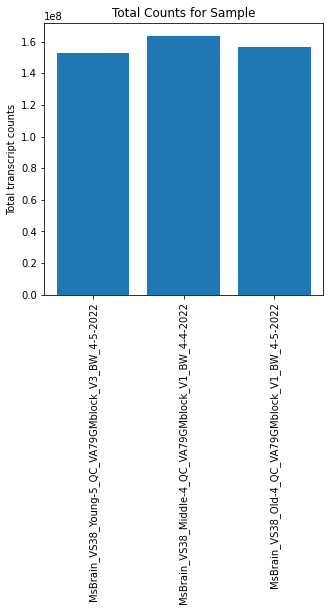

In [110]:
#Plot total counts
total_counts = [sum(a['MERFISH']) for a in gene_counts]
plt.figure(figsize=(5, 5))
plt.bar(x=dataSetNames, height=total_counts)
plt.title('Total Counts for Sample')
plt.xticks(rotation='vertical')
plt.ylabel('Total transcript counts')

In [111]:
#load number of field of views
def load_fov_num_directly_from_s3(dataset_name, analysisHome = 's3://vz-analyzed-merfish'):
    filemap = pd.read_csv(os.path.join(analysisHome, dataset_name, 'filemap.csv'), index_col=0,header=0)
    df = max(filemap['fov']) +1
    return df

fov_number = [load_fov_num_directly_from_s3(d) for d in dataSetNames]
fov_number

[2062, 1875, 1885]

Text(0, 0.5, 'Transcript counts/FOV')

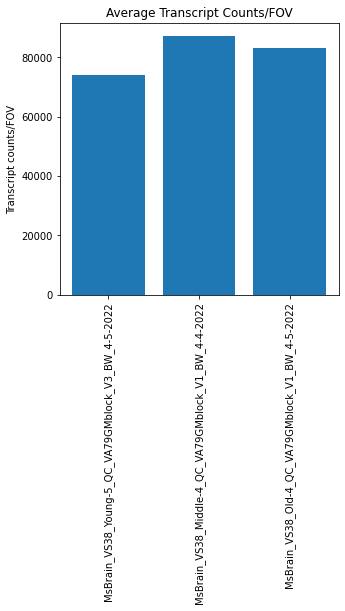

In [112]:
# plots counts/fov
counts_per_fov = [a/b for a, b in zip(total_counts, fov_number)]
plt.figure(figsize=(5, 5))
plt.bar(x=dataSetNames, height=counts_per_fov)
plt.title('Average Transcript Counts/FOV')
plt.xticks(rotation='vertical')
plt.ylabel('Transcript counts/FOV')

# Merge MERFISH and RNA-seq data based on gene id

In [113]:
def MergeData(rnaseq_data_names,rna_seq_FPKM, gene_counts, dataSetNames):
    Finalrnaseq_data_names = rnaseq_data_names.copy()
    Finalrna_seq_FPKM = rna_seq_FPKM.copy()
    Finalgene_counts = gene_counts.copy()
    FinaldataSetNames = dataSetNames.copy()
    A = len (Finalgene_counts) - len(Finalrnaseq_data_names)
    
    print (len(Finalrnaseq_data_names) )
    print (len (Finalgene_counts))
    
    if  len(Finalrnaseq_data_names) == 0: 
        print ('Please enter RNAseq Data')

    if len(Finalrnaseq_data_names) == len(Finalgene_counts):
        merfish_FPKM = [a.join(b.loc[a.index.intersection(b.index)]['FPKM']) for a, b in zip(Finalgene_counts, Finalrna_seq_FPKM)]


    if len(Finalrnaseq_data_names) ==1 &  len(Finalrnaseq_data_names) < len (Finalgene_counts):

        for i in range(abs(A)):
            Finalrnaseq_data_names.append(Finalrnaseq_data_names[0])
            Finalrna_seq_FPKM.append(Finalrna_seq_FPKM[0])
        merfish_FPKM = [a.join(b.loc[a.index.intersection(b.index)]['FPKM']) for a, b in zip(Finalgene_counts, Finalrna_seq_FPKM)]

    if (len(Finalgene_counts) ==1) & (len(Finalrnaseq_data_names) > len (Finalgene_counts)):
        for i in range(abs(A)):
            Finalgene_counts.append(Finalgene_counts[0])
            FinaldataSetNames.append(FinaldataSetNames[0])
        merfish_FPKM = [a.join(b.loc[a.index.intersection(b.index)]['FPKM']) for a, b in zip(Finalgene_counts, Finalrna_seq_FPKM)]
     
    else:
        print("Please enter the same number of MERFISH and RNAseq data when doing multiple dataset comparison")
        
        
    return merfish_FPKM, Finalrnaseq_data_names, Finalrna_seq_FPKM, Finalgene_counts, FinaldataSetNames

In [114]:
[merfish_FPKM,Finalrnaseq_data_names, Finalrna_seq_FPKM, Finalgene_counts, FinaldataSetNames]= MergeData(rnaseq_data_names,rna_seq_FPKM, gene_counts, dataSetNames)

1
3
Please enter the same number of MERFISH and RNAseq data when doing multiple dataset comparison


In [115]:
merfish_FPKM

[                 MERFISH     name                  id       FPKM
 ENST00000000188   730512    Ccnd2  ENSMUST00000000188   9.453102
 ENST00000000642   103984      Hk2  ENSMUST00000000642   0.719935
 ENST00000007130  3749010   Ctnnb1  ENSMUST00000007130  40.767160
 ENST00000008016   176398      Id3  ENSMUST00000008016  21.970542
 ENST00000009435   713638  Pttg1ip  ENSMUST00000009435  15.814760
 ...                  ...      ...                 ...        ...
 ENST00000200681    99083    Cxcl2  ENSMUST00000200681   0.000000
 ENST00000204267   163693  Rarres2  ENSMUST00000204267   3.980229
 ENST00000204411    54420     Cd69  ENSMUST00000204411   0.016970
 ENST00000216072    46015    Cxcr6  ENSMUST00000216072   0.090232
 ENST00000228782    41737     Il7r  ENSMUST00000228782   0.126108
 
 [140 rows x 4 columns],
                  MERFISH     name                  id       FPKM
 ENST00000000188   663865    Ccnd2  ENSMUST00000000188   9.453102
 ENST00000000642   105223      Hk2  ENSMUST000000

# Plot the results--it is possible to correlate multiple RNAseq data with one MERFISH data, multile MERFISH data with one RNAseq data, or the multiple RNAseq against multiple MERFISH data

# plot correaltion between MERFISH and RNA-seq, each sample generate a plot

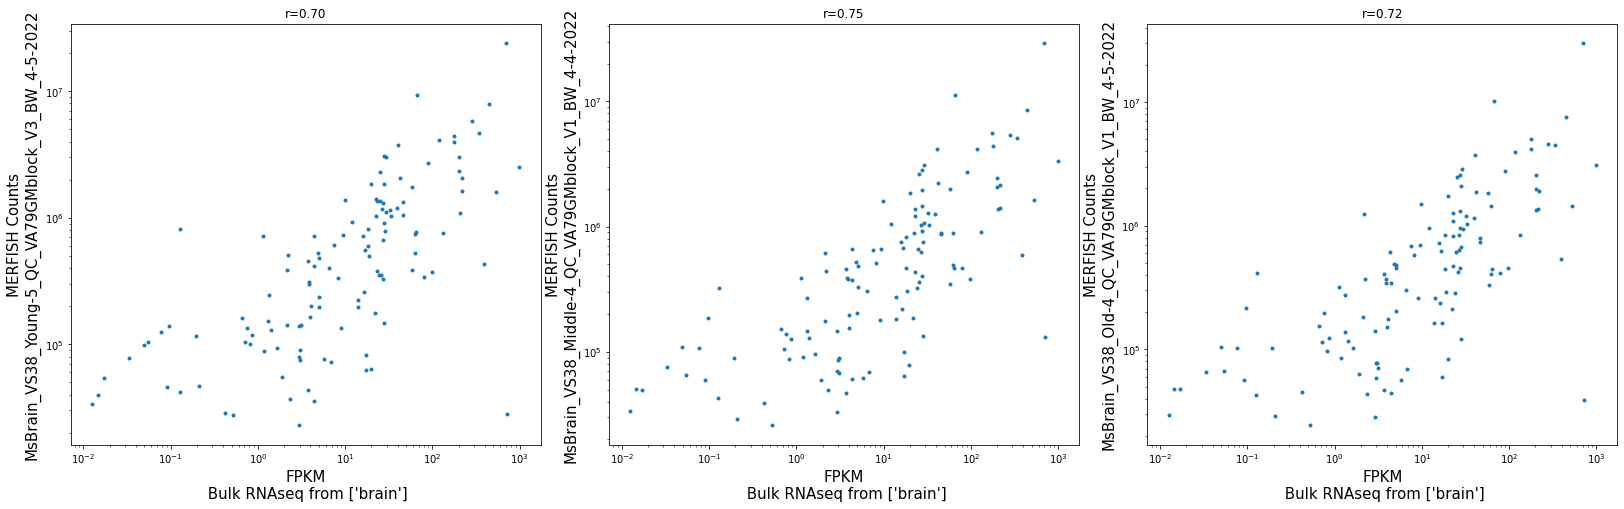

In [116]:
plt.figure(figsize=(7.5*len(merfish_FPKM),7))
for i in range(len(merfish_FPKM)):
    plt.subplot(1, len(merfish_FPKM), i+1)
    
    rnaseq_FPKM=merfish_FPKM[i][merfish_FPKM[i]['FPKM']>0.01]['FPKM']
    merfish_counts=merfish_FPKM[i][merfish_FPKM[i]['FPKM']>0.01]['MERFISH']
    
    plt.loglog(rnaseq_FPKM+0.0001, merfish_counts,'.')
    
    #plt.scatter(x = merfish_FPKM[i]['MERFISH'], y = merfish_FPKM[i]['FPKM'])
    plt.title('r=%0.2f' % 
                  (np.corrcoef(np.log10(rnaseq_FPKM+0.0001), np.log10(merfish_counts))[0,1])
             )
    plt.xlabel('FPKM\n Bulk RNAseq from %s' % Finalrnaseq_data_names[i], fontsize = 15)
    plt.ylabel('MERFISH Counts\n%s'% FinaldataSetNames[i], fontsize = 15)
    
plt.tight_layout(pad=0.5)

#plt.savefig("Correlation_of_MERFISH_counts_and_RNA-seq_FPKM.png")

# Plot correlation between MERFISH data

140
140
140
140
140
140


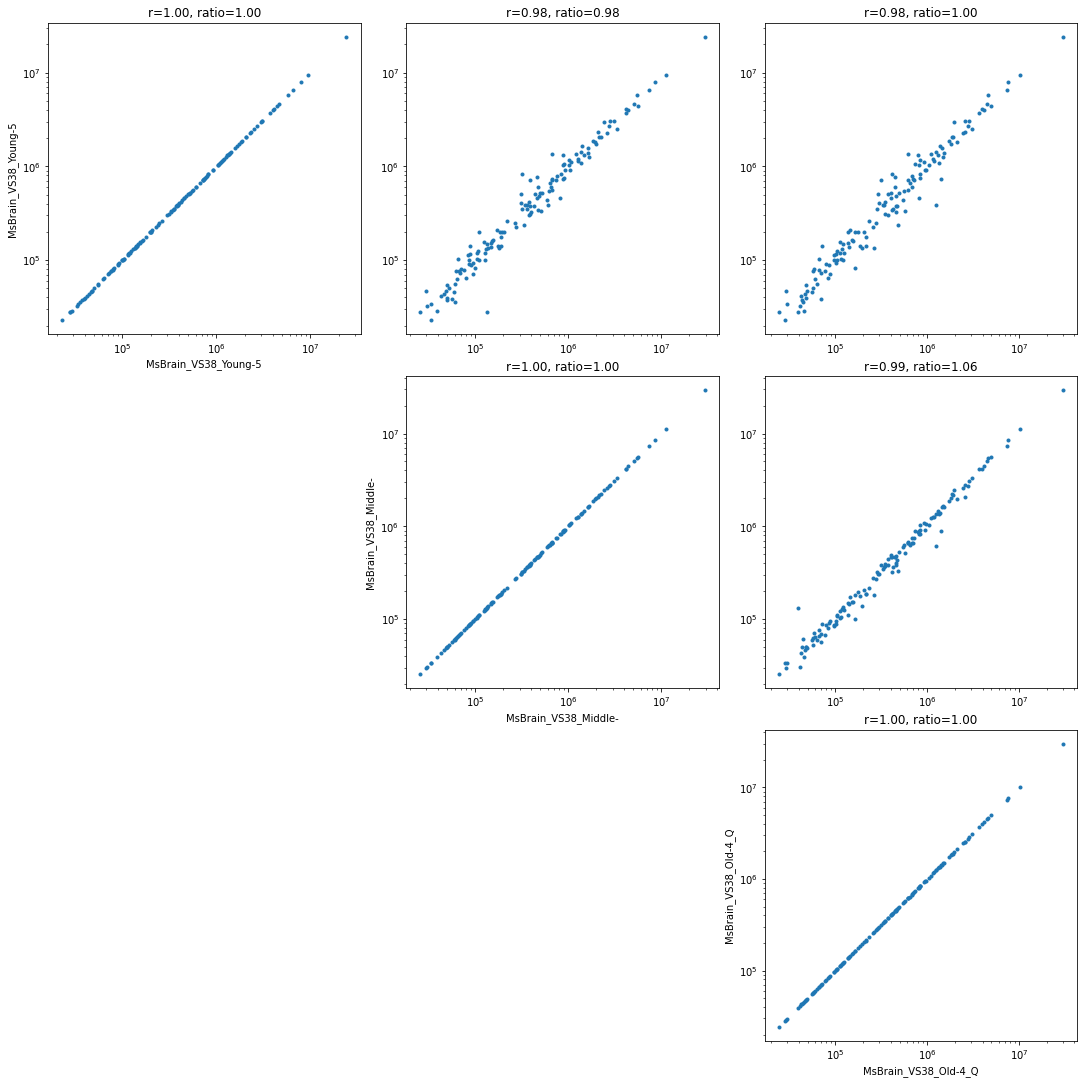

In [117]:

bcCounts  = gene_counts.copy()
plt.figure(figsize=(15,15))
index = 0
for j, b2 in enumerate(bcCounts):
    for i, b in enumerate(bcCounts):
  
        b.index = b['name']
        b2.index = b2['name'] 
        if i >= j:
            commonGenes = b['name'][
                    (b['name'].isin(b2['name'])) 
                    & ~b['name'].str.contains('Blank')].values
            print(len(commonGenes))

            plt.subplot(len(bcCounts), len(bcCounts), index+1)                
            bcCounts_1=b.loc[commonGenes]['MERFISH']
            bcCounts_2=b2.loc[commonGenes]['MERFISH']
            plt.loglog(bcCounts_1+0.0001, bcCounts_2+0.0001,'.')
            
            
            if i == j:     
                plt.xlabel(FinaldataSetNames[i][:20])
                plt.ylabel(FinaldataSetNames[j][:20])
                
            A = (np.corrcoef(np.log10(bcCounts_1+0.0001), np.log10(bcCounts_2+0.0001))[0,1])
            B = np.median(bcCounts_2/bcCounts_1)
            
            plt.title('r=%0.2f, ratio=%0.2f' % (A, B)
            )
            
        index += 1

plt.tight_layout(pad=0.5)

# Plot correlation between RNAseq data

131827


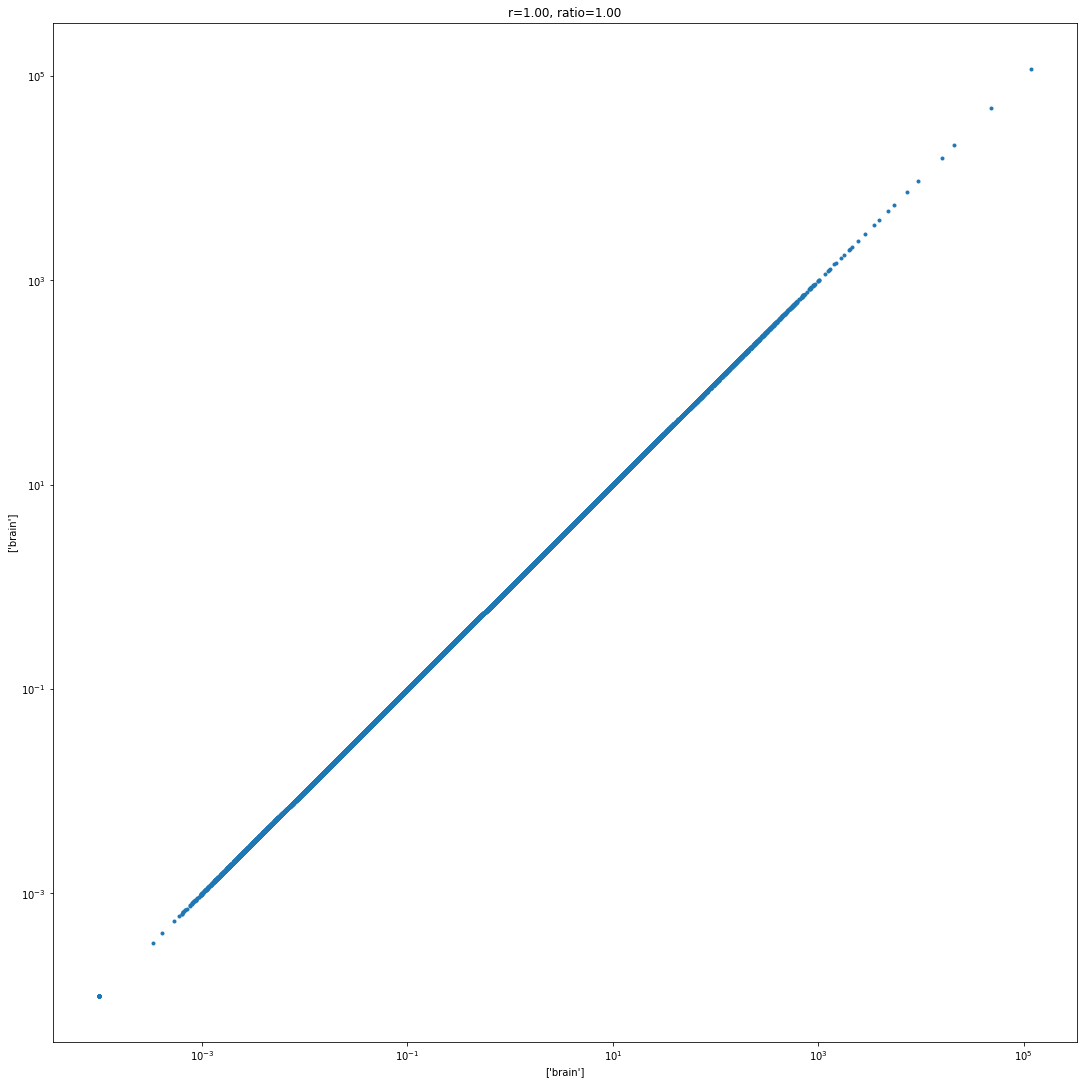

In [118]:
RNASEQ  = rna_seq_FPKM.copy()
plt.figure(figsize=(15,15))
index = 0
for j, b2 in enumerate(RNASEQ):
    for i, b in enumerate(RNASEQ):
  

        if i >= j:
            commonGenes = b.index[
                    (b.index.isin(b2.index)) 
                    & ~np.isnan(b['FPKM'])& ~np.isnan(b2['FPKM'])].values
            print(len(commonGenes))

            plt.subplot(len(RNASEQ), len(RNASEQ), index+1)      
            
            bcCounts_1=b.loc[commonGenes]['FPKM']
            bcCounts_2=b2.loc[commonGenes]['FPKM']
            plt.loglog(bcCounts_1+0.0001, bcCounts_2+0.0001,'.')
            
            
            if i == j:     
                plt.xlabel(Finalrnaseq_data_names[i][:20])
                plt.ylabel(Finalrnaseq_data_names[j][:20])
                
            A = np.corrcoef(np.log10(bcCounts_1+0.0001), np.log10(bcCounts_2+0.0001))[0,1]
            B = np.median((bcCounts_2+0.0001)/(bcCounts_1+0.0001))
            plt.title('r=%0.2f, ratio=%0.2f' % (A, B)
            )
            
        index += 1

plt.tight_layout(pad=0.5)

# Don't run the code below

# Load MERSCOPE Data by reading barcodes.csv

dataSetNames = ['202203271936_HuColonCa-FFPE-ImmunOnco-LH_Beta10']

def load_barcodes_directly_from_s3(dataset_name, region = 'region_0', analysisHome = 's3://vz-analyzed-merfish'):
    df = pd.read_csv(os.path.join(analysisHome, dataset_name, 'ExportBarcodes', region, 'barcodes.csv'), index_col=0)
    return df

def load_codebook_directly_from_s3(dataset_name, analysisHome = 's3://vz-analyzed-merfish'):
    f = S3DataPortal(f's3://vz-analyzed-merfish/{dataset_name}/')
    codebook_path = [i for i in f.list_files(recursive=False) if 'codebook_' in i][0]
    cbook = pd.read_csv('s3://'+codebook_path, index_col=False)
    return cbook

bcDatabase = [load_barcodes_directly_from_s3(d)
              for d in dataSetNames]
codebooks = [load_codebook_directly_from_s3(d) for d in dataSetNames]

In [24]:

#datasets = [dataset.MERFISHDataSet(d, analysisHome='/fsx') for d in dataSetNames]

In [25]:
#bcDatabase = [d.load_dataframe_from_csv('barcodes', 'ExportBarcodes', subdirectory = 'region_0')
 #             for d in datasets]

TotalCounts = [len(b) for b in bcDatabase]
CountsPerFOV = [len(b)/len(np.unique(b['fov'])) for b in bcDatabase]
print(TotalCounts)
print(CountsPerFOV)

# Plot Total Counts and average counts/fov

plt.figure(figsize=(5, 5))
plt.bar(x=dataSetNames, height=TotalCounts)
plt.title('Total Counts for Sample')
plt.xticks(rotation='vertical')
plt.ylabel('Total transcript counts')

plt.figure(figsize=(5, 5))
plt.bar(x=dataSetNames, height=CountsPerFOV)
plt.title('Average Transcript Counts/FOV')
plt.xticks(rotation='vertical')
plt.ylabel('Transcript counts/FOV')

# Create dataframe to load bulk RNAseq and MERFISH Data

In [26]:
bcCounts = [pd.DataFrame(np.transpose(np.unique(bc['barcode_id'], return_counts=True)))
            for bc in bcDatabase]

cb1 = datasets[0].get_codebook()
#cb2 = datasets[1].get_codebook()

import os
import numpy as np
import re

for d, b in zip(datasets, bcCounts):
    for i in b.index:
        tID = d.get_codebook()._data.iloc[i]['id']
        # Handle blanks and missing IDs by setting FPKM to 0
        if tID == -1 or tID == 'nan' or tID == '-1':
            b.at[i,2] = 0
        else:
        # Handle tIDs in different formats (str vs integer)
            if isinstance(tID, str) and not isinstance(exampleAbundance.isoformData.index[0], str):
                tID = tID.split('.')[0] # In case version still included
                tID = int(only_numerics(tID)) # Convert to numeric value
            b.at[i, 2] = abundanceData.get_abundance_for_transcript_id(tID)
            

for d, b in zip(datasets, bcCounts):
    b[0] = [d.get_codebook().get_name_for_barcode_index(i) for i in b[0]]
    b.columns = ['Gene', 'MERFISH', 'FPKM']

NameError: name 'bcDatabase' is not defined

In [ ]:
plt.figure(figsize=(5, 5))

for i, b in enumerate(bcCounts):
    plt.subplot(1, len(bcCounts), i+1)
    
    eB = b
    plt.loglog(eB[eB['FPKM']>0.01]['FPKM']+0.0001, eB[eB['FPKM']>0.01]['MERFISH'] ,'.')

    plt.xlabel('FPKM')
    plt.ylabel('Copy number, MERFISH\n(%s)' % dataSetNames[i][:20])
    plt.title('r=%0.2f' %
              np.corrcoef(np.log10(eB[eB['FPKM']>0.01]['FPKM']+0.0001), 
                          np.log10(eB[eB['FPKM']>0.01]['MERFISH']))[0,1])

plt.tight_layout(pad=0.5)
#plt.legend(['Unenriched', 'Female enriched', 'Male enriched'])
plt.savefig('Correlation with bulk RNAseq.png')

# Correlation between different datasets

In [ ]:
for b in bcCounts:
    b.index = b['Gene']

In [ ]:
plt.figure(figsize=(10,10))
.loc[commonGenes]['MERFISH']/len(datasets[i].get_fovs())/
                                 (b2.loc[commonGenes]['MERFISH']/len(datasets[j].get_fovs()))))))
            plt.plot([10, 1e5], [10, 1e5])

index = 0

for j, b2 in enumerate(bcCounts):
    for i, b in enumerate(bcCounts):
        if i >= j:
            commonGenes = b['Gene'][
                    (b['Gene'].isin(b2['Gene'])) 
                    & ~b['Gene'].str.contains('Blank')].values
            print(len(commonGenes))
            plt.subplot(len(bcCounts), len(bcCounts), index+1)
            plt.loglog(b.loc[commonGenes]['MERFISH']/
                       len(datasets[i].get_fovs()), 
                       b2.loc[commonGenes]['MERFISH']/
                       len(datasets[j].get_fovs()), '.')
            if i == j:
                plt.xlabel(datasets[i].dataSetName[:13])
                plt.ylabel(datasets[j].dataSetName[:13])
            plt.title('r=%0.2f, ratio=%0.2f' %
                      (np.corrcoef(np.log10(b2.loc[commonGenes]['MERFISH']), 
                                  np.log10(b.loc[commonGenes]['MERFISH']))[0,1],
                       np.median((b
        index += 1

plt.tight_layout(pad=0.5)
plt.savefig("Correlation for biological replicates.png")